<a href="https://colab.research.google.com/github/mdnazmulislam0087/Tensorflow-Practice-me/blob/master/Course_1_Part_6_Lesson_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Without Convolution Layer

In [3]:
import tensorflow as tf
dataset=tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels)=dataset.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation=tf.nn.softmax)

])

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics='acc')
model.fit(training_images,training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4920 - acc: 0.8271
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3675 - acc: 0.8668
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3334 - acc: 0.8783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3078 - acc: 0.8867
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2917 - acc: 0.8922
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2785 - acc: 0.8973
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2670 - acc: 0.9021
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2554 - acc: 0.9046
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2468 - acc: 0.9087
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2403 - acc: 0.9105


In [4]:
test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3456 - acc: 0.8826


# With convolution Layer


In [10]:
import tensorflow as tf
dataset=tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels)=dataset.load_data()
training_images=training_images.reshape(60000,28,28,1)
training_images=training_images/255.0
test_images=test_images.reshape(10000,28,28,1)

model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu ,input_shape=(28,28,1)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation=tf.nn.softmax)


])
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='acc')
model.fit(training_images,training_labels,epochs=10)
eval=model.evaluate(test_images,test_labels)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

#Visualizing the Convolutions and Pooling

In [12]:
print(test_labels[:50])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2]


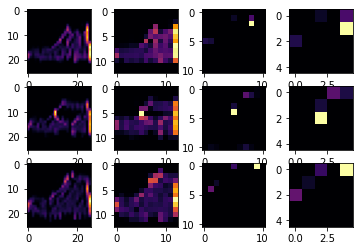

In [15]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [16]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.2.0-rc3
11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1420 - accuracy: 0.9581
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0499 - accuracy: 0.9847
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0321 - accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0207 - accuracy: 0.9935
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0134 - accuracy: 0.9958
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0111 - accuracy: 0.9966
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0078 - accuracy: 0.9973
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0060 - accuracy: 0.9981
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0052 - accuracy: 0.9983
Epoch 1